In [1]:
import keras
from keras.datasets import mnist
# load and split the MNIST digits dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(10000,)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

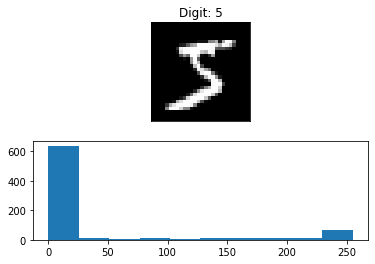

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))



In [15]:
x_train[0].reshape(784)
x_test[0].reshape(784)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [19]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [21]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [22]:
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [24]:
print("shape before one-hot encoding :",y_train.shape)
y_train = keras.utils.np_utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.np_utils.to_categorical(y_test,num_classes=10)
print("shape before one-hot encoding :",y_train.shape)

shape before one-hot encoding : (60000,)
shape before one-hot encoding : (60000, 10)


In [26]:
batch_size = 128
num_classes = 10
epochs = 20
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
 optimizer=sgd,
 metrics=['accuracy'])
history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.4615 - accuracy: 0.8754 - val_loss: 0.2726 - val_accuracy: 0.9253
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2483 - accuracy: 0.9313 - val_loss: 0.2131 - val_accuracy: 0.9389
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1983 - accuracy: 0.9443 - val_loss: 0.1782 - val_accuracy: 0.9489
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1654 - accuracy: 0.9537 - val_loss: 0.1529 - val_accuracy: 0.9566
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1425 - accuracy: 0.9600 - val_loss: 0.1373 - val_accuracy: 0.9587
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1248 - accuracy: 0.9653 - val_loss: 0.1217 - val_accuracy: 0.9638
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1106 - accuracy: 0.9697 - val_loss: 0.1132 - val_accuracy: 0.9678
Epoch 

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.06911591440439224
Test accuracy: 0.979200005531311


In [29]:
import os
# saving the model
save_dir = "results/"
model_name = 'keras_mnist_mlp.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist_mlp.h5 
